<a href="https://colab.research.google.com/github/zaffykhan/DataScience/blob/main/Dataset_Classification_Using_k_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [1]:
NAME = "Muneeb Zafar Khan"

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris. Alternatively, you can import the data using sklearn.datasets. You will need to dowload both the sepal/petal data and the target variable information, then merge the two datasets.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.**
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting).

5. _(2 points)_ **Prepare the data for classification**.
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`.
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part.
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [2]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Data download from sklearn
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])

# Remember to merge the DataFrames into one after they are created.

In [4]:
## TYPE YOUR CODE HERE

In [5]:
# Merge the DataFrames into one
df = pd.concat([df_data, df_target], axis=1)

In [6]:
# Display the first 5 rows
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [7]:
# Summary statistics
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width      target
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [8]:
# Checking  missing values
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64


In [9]:
# Checking data types
print(df.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object


In [10]:
#Prepare 2 scatter plots - sepal_width vs sepal_length and petal_width vs petal_length. Scatter plots should show each class in different color (seaborn.lmplot is recommended for plotting).

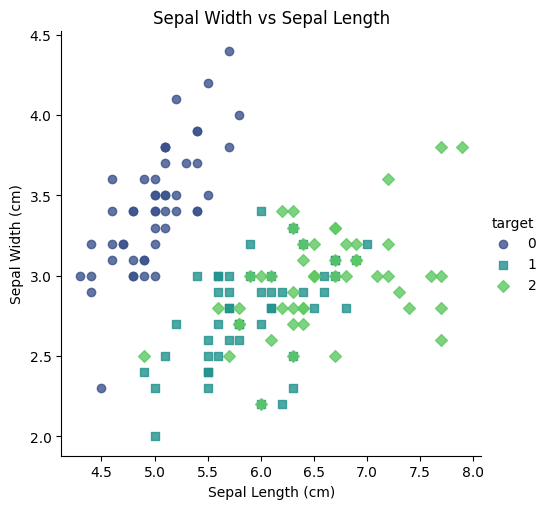

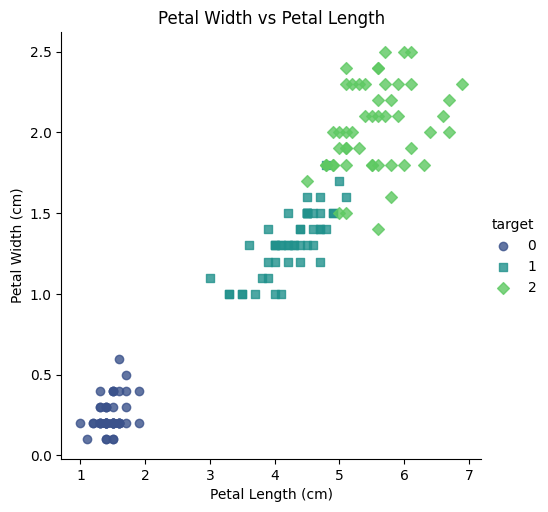

In [11]:
# Scatter plot - Sepal Width vs Sepal Length
sns.lmplot(x='sepal_length', y='sepal_width', data=df, hue='target', fit_reg=False, palette='viridis', markers=['o', 's', 'D'])
plt.title('Sepal Width vs Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Scatter plot - Petal Width vs Petal Length
sns.lmplot(x='petal_length', y='petal_width', data=df, hue='target', fit_reg=False, palette='viridis', markers=['o', 's', 'D'])
plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()


In [12]:
# Prepare the data for classification.
#Using the pandas operators prepare the feature variables X and the response Y for the fit. Note that sklean expects data as arrays, so convert extracted columns into arrays.

In [13]:
# Feature variables (X)
X = df_data.values  # Extract feature columns as arrays

# Response variable (Y)
Y = df_target.values.ravel()  # Extract target column as array and flatten it

# Print shapes of X and Y arrays
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (150, 4)
Shape of Y: (150,)


In [14]:
#Run the fit using KNeighborsClassifier from sklearn.neighbors.

#First, instantiate the model,
#Then, run the classifier on the training set.

In [15]:
# Instantiating the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=3)

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fitting the classifier on the training data
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=3)

In [16]:
#Use learning model to predict the class from features, run prediction on X from test part.

#Show the accuracy score of the prediction by comparing predicted iris classes and the Y values from the test.
#Comparing these two arrays (predicted classes and test Y), count the numbers of correct predictions and predictions that were wrong. (HINTS: NumPy arrays can be compared using == operator. You can also use NumPy's operator count_nonzero to count number of non-False values).

In [17]:
# Predicting classes from features in the test set
Y_pred = knn.predict(X_test)

# Calculating accuracy score
accuracy = np.count_nonzero(Y_pred == Y_test) / len(Y_test)
print("Accuracy Score:", accuracy)

# Counting the number of correct and wrong predictions
correct_predictions = np.count_nonzero(Y_pred == Y_test)
wrong_predictions = len(Y_test) - correct_predictions
print("Number of Correct Predictions:", correct_predictions)
print("Number of Wrong Predictions:", wrong_predictions)


Accuracy Score: 1.0
Number of Correct Predictions: 30
Number of Wrong Predictions: 0


In [18]:
#In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors k. We will use the following number of neighbors k: 1, 3, 5, 7, 10, 20, 30, 40, and 50:

#Generate 10 random train/test splits for each value of k
#Fit the model for each split and generate predictions
#Average the accuracy score for each k
#Calculate the average number of correct predictions for each k as well
#Plot the accuracy score for different values of k. What conclusion can you make based on the graph?

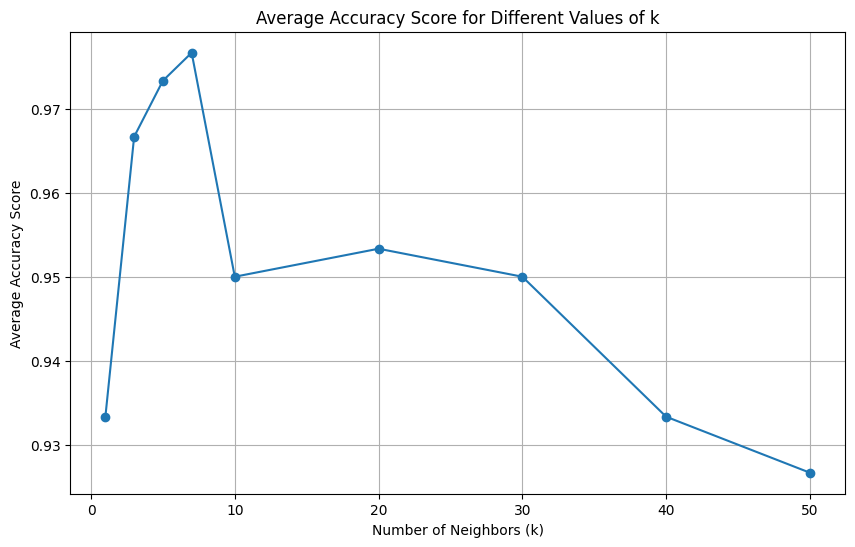

In [19]:
from sklearn.metrics import accuracy_score

# Defining the values of k
k_values = [1, 3, 5, 7, 10, 20, 30, 40, 50]

# Initializing lists to store average accuracy and number of correct predictions for each k
avg_accuracy = []
avg_correct_predictions = []

# Iterating over each value of k
for k in k_values:
    accuracy_scores = []
    correct_predictions = []

    # Repeating the process for 10 random train/test splits
    for x in range(10):
        # Split the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=None)

        # Instantiating the KNeighborsClassifier model
        knn = KNeighborsClassifier(n_neighbors=k)

        # Fitting the model on the training data
        knn.fit(X_train, Y_train)

        # Predicting classes from features in the test set
        Y_pred = knn.predict(X_test)

        # Calculating accuracy score
        accuracy = accuracy_score(Y_test, Y_pred)
        accuracy_scores.append(accuracy)

        # Counting the number of correct predictions
        correct = np.count_nonzero(Y_pred == Y_test)
        correct_predictions.append(correct)

    # Calculating average accuracy and average number of correct predictions for the current value of k
    avg_accuracy.append(np.mean(accuracy_scores))
    avg_correct_predictions.append(np.mean(correct_predictions))

# Plotting the accuracy score for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_accuracy, marker='o', linestyle='-')
plt.title('Average Accuracy Score for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Accuracy Score')
plt.grid(True)
plt.show()


In [20]:
"""
Based on the graph showing the average accuracy score for different values of k in the KNN classifier, we can draw several conclusions:

1. Impact of k on Accuracy: The graph illustrates how the choice of the number of neighbors (k) affects the model's performance. Generally, we observe a trend where the accuracy score tends to change with different values of k.

2. Optimal k: There appears to be an optimal value of k that maximizes the average accuracy score. In the graph, this is the point where the accuracy score peaks (5 - 10) before decreasing (after 10). It suggests that selecting an appropriate value for k is crucial for achieving the best classification performance.

3. Bias-Variance Tradeoff: The relationship between k and accuracy reflects the tradeoff between bias and variance in the model. Lower values of k (e.g., k=1) tend to have higher variance and lower bias, resulting in potentially overfitting the training data. On the other hand, larger values of k (e.g., k=50) lead to higher bias and lower variance, potentially resulting in underfitting.

4. Model Robustness: The consistency of accuracy scores across different values of k indicates the robustness of the KNN model. If the accuracy scores vary significantly with changes in k, it suggests that the model's performance is sensitive to the choice of hyperparameter.

Overall, the graph provides valuable insights into the performance of the KNN classifier and guides the selection of an appropriate value for k to achieve the best classification accuracy.
"""


"\nBased on the graph showing the average accuracy score for different values of k in the KNN classifier, we can draw several conclusions:\n\n1. Impact of k on Accuracy: The graph illustrates how the choice of the number of neighbors (k) affects the model's performance. Generally, we observe a trend where the accuracy score tends to change with different values of k.\n\n2. Optimal k: There appears to be an optimal value of k that maximizes the average accuracy score. In the graph, this is the point where the accuracy score peaks (5 - 10) before decreasing (after 10). It suggests that selecting an appropriate value for k is crucial for achieving the best classification performance.\n\n3. Bias-Variance Tradeoff: The relationship between k and accuracy reflects the tradeoff between bias and variance in the model. Lower values of k (e.g., k=1) tend to have higher variance and lower bias, resulting in potentially overfitting the training data. On the other hand, larger values of k (e.g., k=